In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('./homicidios-mulheres-1996-01-01-2019-01-01.csv')

In [2]:
data

,cod,nome,período,valor
0,3,SE,1996,1918
1,1,N,1996,224
2,5,CO,1996,337
3,2,NE,1996,791
4,4,S,1996,413
...,...,...,...,...
110,2,NE,2018,1610
111,5,CO,2018,429
112,3,SE,2018,1282
113,1,N,2018,639


<Axes: >

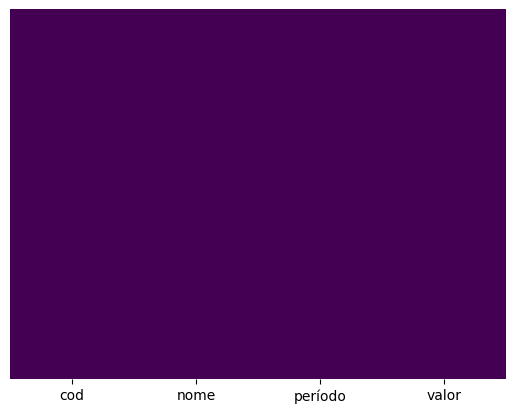

In [8]:
sns.heatmap(data.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')

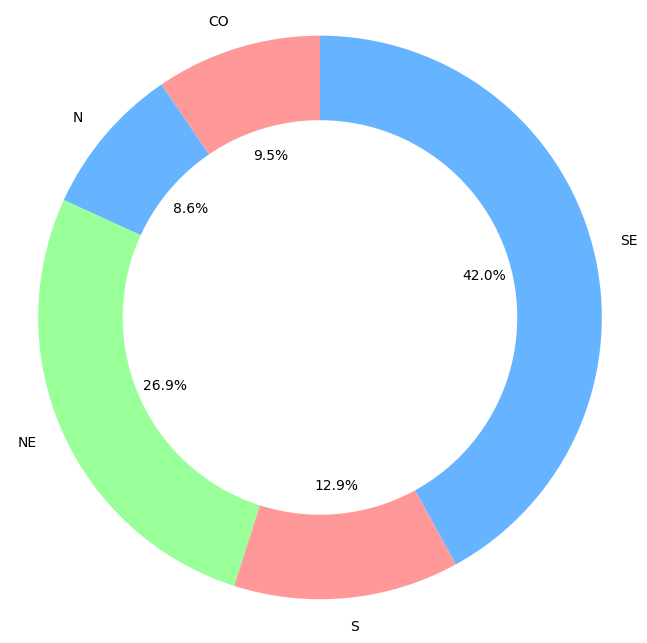

In [4]:
regions = ["S", "SE", "NE", "CO", "N"]
filtered_data = data[data["nome"].isin(regions)]

grouped_data = filtered_data.groupby("nome").sum().reset_index()

colors = ['#ff9999', '#66b3ff', '#99ff99']
labels = grouped_data["nome"]
sizes = grouped_data["valor"]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# plt.title("Comparação dos Homicídios de Mulheres nas Regiões S, SE e NE")
plt.axis('equal')
plt.show()

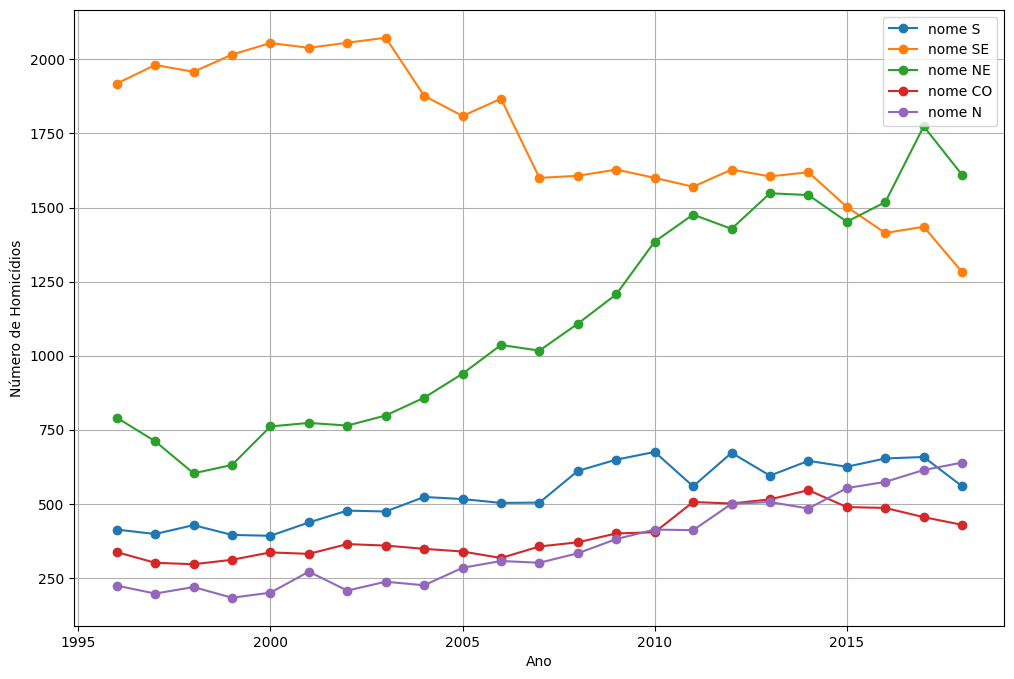

In [5]:
grouped_data = filtered_data.groupby(["período", "nome"]).sum().reset_index()

plt.figure(figsize=(12, 8))

for region in regions:
    region_data = grouped_data[grouped_data["nome"] == region]
    years = region_data["período"]
    values = region_data["valor"]
    plt.plot(years, values, marker='o', label=f"nome {region}")


plt.xlabel("Ano")
plt.ylabel("Número de Homicídios")
plt.legend()
plt.grid(True)
plt.show()
